In [18]:
import math
import numpy as np
import torch as torch
import matplotlib.pyplot as plt


func = "cos(exp(x))"

In [19]:
points_count = 101

In [20]:
def get_data():
    x_points = np.array([])
    y_points = np.array([])
    i = 0
    for batch_i in np.arange(2., 4.01, 0.01): 
        x_points = np.append(x_points, round(batch_i, 2))
        y_points = np.append(y_points, round(math.cos(math.exp(x_points[i])) + np.random.uniform(-0.2, 0.2), 2))
        i += 1
    return x_points, y_points

In [21]:
x, y = get_data()

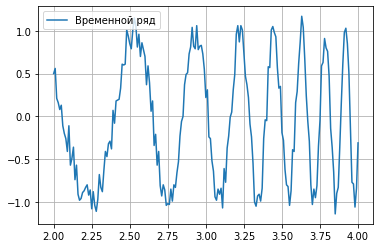

In [22]:
plt.grid()
plt.plot(x, y, label='Временной ряд')
plt.legend()

In [23]:
konst = len(y)-(points_count+1)
print(konst)

99


In [24]:
samples_data = list()
samples_targets = list()

for i in range(konst):
    samples_data.append(y[i:i + points_count])
    samples_targets.append(y[i + points_count+1:i + points_count+2])

In [25]:
train_data = samples_data[len(samples_targets)//3:]
train_targets = samples_targets[len(samples_targets)//3:]

In [26]:
x_train = torch.FloatTensor(train_data)
y_train = torch.FloatTensor(train_targets)

In [27]:
print(len(x_train))

66


In [28]:
test_data = samples_data[len(samples_targets)//3:len(samples_targets)-(len(samples_targets)//3)]
test_targets = samples_targets[len(samples_targets)//3:len(samples_targets)-(len(samples_targets)//3)]

In [29]:
print(test_targets)

[array([-0.91]), array([-0.99]), array([-0.84]), array([-0.26]), array([-0.04]), array([-0.05]), array([0.58]), array([0.57]), array([1.01]), array([1.05]), array([0.98]), array([0.93]), array([0.57]), array([0.33]), array([0.35]), array([-0.19]), array([-0.28]), array([-0.62]), array([-0.8]), array([-0.82]), array([-1.04]), array([-0.87]), array([-0.39]), array([-0.41]), array([0.16]), array([0.29]), array([0.62]), array([0.87]), array([1.17]), array([1.04]), array([0.67]), array([0.24]), array([-0.06])]


In [30]:
x_test = torch.FloatTensor(test_data)
y_test = torch.FloatTensor(test_targets)

In [31]:
print(len(y_train))

66


In [33]:
learning_rate = 0.0001
epochs = 10000

three_layer_net = torch.nn.Sequential(
        torch.nn.Linear(points_count, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 1),
    )

loss_fn = torch.nn.SmoothL1Loss(size_average=False)
optim = torch.optim.ASGD(three_layer_net.parameters(), lr=learning_rate)

for epoch in range(epochs):
    y_pred = three_layer_net(x_train)
    loss = loss_fn(y_pred, y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if epoch % 1000 == 0:
        print(epoch, "эпоха")
print("Обучение завершено")

0 эпоха
1000 эпоха
2000 эпоха
3000 эпоха
4000 эпоха
5000 эпоха
6000 эпоха
7000 эпоха
8000 эпоха
9000 эпоха
Обучение завершено


In [34]:
y_preds_test = three_layer_net(x_test)

In [35]:
x_graph_preds = np.array([])

for i in range(len(x)-len(samples_targets)//3, len(x)):
    x_graph_preds = np.append(x_graph_preds, x[i])

In [36]:
y_preds_test = y_preds_test.data.numpy()
y_preds_test = y_preds_test.reshape(x_graph_preds.shape)

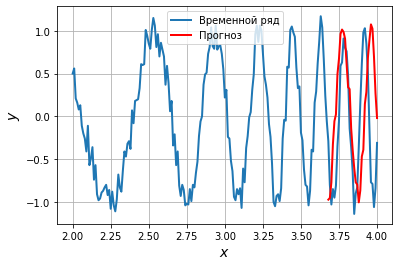

In [37]:
plt.plot(x, y, label='Временной ряд', linewidth=2)
plt.plot(x_graph_preds, y_preds_test, label='Прогноз', color='red', linewidth=2)

plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()